In [14]:
id1 = "316390053"

name_student_1 = "bar, gavriely"

import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', 15)

df = pd.DataFrame([id1])
# Uncomment in case two students are doing the assignment together
# df = pd.DataFrame([id1])df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url)
vacc_df = vacc_df.copy()
%matplotlib inline

In [15]:
vacc_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [35]:
newvacc = vacc_df.dropna(how="all")
newvacc = newvacc.interpolate(method='linear',limit_direction='both')


In [16]:
Bra=vacc_df[vacc_df["location"]=="Brazil"]
Bra.head(3)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3426,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3427,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.0,0.0,NaN,1.0
3428,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.0,0.0,NaN,3.0


In [17]:
Bra.isnull().sum().sort_values(ascending = False)

people_fully_vaccinated_per_hundred    38
people_fully_vaccinated                38
daily_vaccinations_raw                 25
people_vaccinated_per_hundred          17
total_vaccinations_per_hundred         17
people_vaccinated                      17
total_vaccinations                     17
daily_vaccinations_per_million          1
daily_vaccinations                      1
date                                    0
iso_code                                0
location                                0
dtype: int64

In [18]:
Bra[pd.isnull(Bra[["daily_vaccinations"]])]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
Bra.dropna(how="all")
Bra["daily_vaccinations"].interpolate(method='linear',limit_direction='both')


3426       112.0
3427       112.0
3428       554.0
3429      3823.0
3430      7136.0
          ...   
3568    749851.0
3569    789718.0
3570    841848.0
3571    794257.0
3572    859294.0
Name: daily_vaccinations, Length: 147, dtype: float64

<AxesSubplot:ylabel='Frequency'>

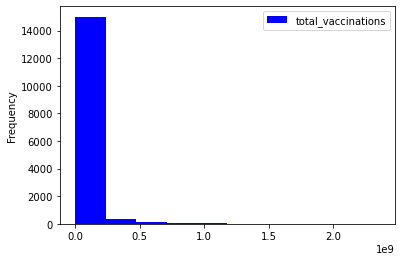

In [23]:
vacc_df.plot.hist(x="people_vaccinated",y="total_vaccinations",color ="Blue")

<AxesSubplot:>

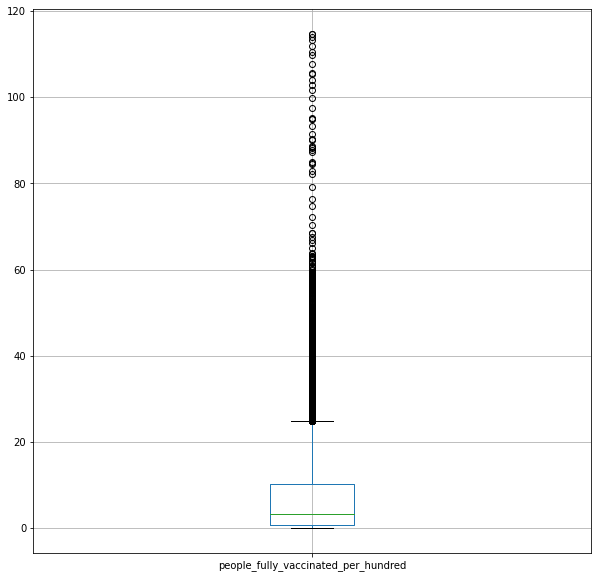

In [27]:
vacc_df.boxplot("people_fully_vaccinated_per_hundred",figsize=(10,10))

In [36]:
vacc_df["people_fully_vaccinated_per_hundred"].median()

3.19

In [37]:
newvacc["Month"] = pd.DatetimeIndex(newvacc["date"]).month

In [38]:
newvacc

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,Month
0,Afghanistan,AFG,2021-02-22,0.000000e+00,0.000000,55624.0,2859.0,1367.0,0.000000,0.000000,0.14,35.0,2
1,Afghanistan,AFG,2021-02-23,1.366667e+03,1366.666667,55624.0,2859.0,1367.0,0.003333,0.003333,0.14,35.0,2
2,Afghanistan,AFG,2021-02-24,2.733333e+03,2733.333333,55624.0,2859.0,1367.0,0.006667,0.006667,0.14,35.0,2
3,Afghanistan,AFG,2021-02-25,4.100000e+03,4100.000000,55624.0,2859.0,1367.0,0.010000,0.010000,0.14,35.0,2
4,Afghanistan,AFG,2021-02-26,5.466667e+03,5466.666667,55624.0,2859.0,1367.0,0.013333,0.013333,0.14,35.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26145,Zimbabwe,ZWE,2021-06-06,1.068107e+06,687321.000000,380786.0,6156.0,8019.0,7.190000,4.620000,2.56,540.0,6
26146,Zimbabwe,ZWE,2021-06-07,1.073971e+06,688696.000000,385275.0,5864.0,7699.0,7.230000,4.630000,2.59,518.0,6
26147,Zimbabwe,ZWE,2021-06-08,1.078809e+06,689397.000000,389412.0,4838.0,6790.0,7.260000,4.640000,2.62,457.0,6
26148,Zimbabwe,ZWE,2021-06-09,1.083983e+06,689920.000000,394063.0,5174.0,6253.0,7.290000,4.640000,2.65,421.0,6


In [39]:
newvacc.groupby("Month")[["people_vaccinated_per_hundred","daily_vaccinations"]].max()

,people_vaccinated_per_hundred,daily_vaccinations
Month,,
1,60.722647,4701019.0
2,69.800000,11818436.5
3,94.210000,15399878.0
4,111.320000,20450043.0
5,116.025000,34242088.0
6,116.110000,35738500.0
12,60.460829,2384454.0
